In [1]:
import pandas as pd

# First, reading the csv and show it first 5 rows

df = pd.read_csv('spam-text.csv')
df.head()

Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...

# Data clearence

In [2]:
# using info() to provide us infos about csv's column, Dtype and the Non-Null Count

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [3]:
# using groupby().count() combine for counting the number of ham and spam in the csv

counts = df.groupby('Category').count()
print(counts)

          Message
Category         
ham          4825
spam          747


In [4]:
# using duplicated().sum() combine for counting the number duplicates

df.duplicated().sum()

415

In [5]:
# were not acually droping the duplicate here, we just see the number of rows without duplicates

df.drop_duplicates()

Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5157 rows x 2 columns]

In [6]:
# Now we acually remove duplicates using drop_duplicates(inplace = True)

df.drop_duplicates(inplace = True)

In [7]:
# checking out if duplicate were removed

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [8]:
# counting the number of ham and spam without duplicates

counts = df.groupby('Category').count()
print(counts)

          Message
Category         
ham          4516
spam          641


In [9]:
# Checking out if there is Nulls in the csv
# It seems there is no Null

df.isnull()

Category  Message
0        False    False
1        False    False
2        False    False
3        False    False
4        False    False
...        ...      ...
5567     False    False
5568     False    False
5569     False    False
5570     False    False
5571     False    False

[5157 rows x 2 columns]

# Data Visualization

In [10]:
# Def spam from 'Category' as 0 and Def ham from 'Category' as 1
# Def X as df['Message'] and Def y = df['Category']

df.loc[df['Category'] == 'spam', 'Category',] = 0
df.loc[df['Category'] == 'ham', 'Category',] = 1

X = df['Message']

y = df['Category']

Category
1    4516
0     641
Name: count, dtype: int64
[1, 0]


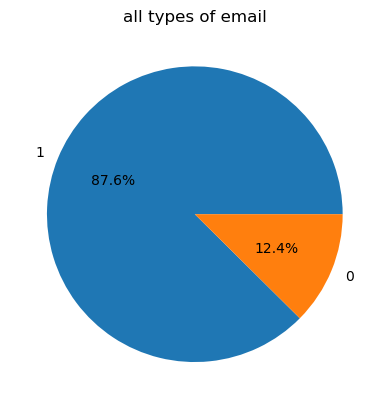

In [11]:
# import matplotlib.pyplot as plt to visualize the number of ham and spam in a Pie

import matplotlib.pyplot as plt

# using value_counts() to count the number of ham and spam

count_values = y.value_counts()
print(count_values)

# using index.to_list() to print a list of the values that we desired

labels = count_values.index.to_list()
print(labels)

plt.title('all types of email')

plt.pie(x = count_values, labels = labels, autopct = '%1.1f%%' )

plt.show()

In [12]:
# using from sklearn.utils import resample to balance the numbers of emails, so the model well not be biase to type 1 email

from sklearn.utils import resample

print("Before resampling: ",len(X))
 
df_0 = df[df['Category'] == 0]

df_1 = df[df['Category'] == 1]  

count_1=df_1['Category'].count()

df_0_upsampled = resample(df_0, n_samples= count_1, replace=True)

df = pd.concat([df_0_upsampled,df_1])
 

X = df.drop('Category',axis=1)
print("After resampling: ",len(X))

y = df['Category']

count_values=y.value_counts()

labels = count_values.index.to_list()

plt.title('all types of email(V2)')

plt.pie(x = count_values, labels = labels, autopct = '%1.1f%%' )

plt.show()

# and now we have 9032 email after resampling

Before resampling:  5157
After resampling:  9032


# classification

In [13]:
# using from sklearn.model_selection import train_test_split to split data to data_train and data_test

from sklearn.model_selection import train_test_split

X = df['Message']

y = df['Category']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [14]:
# using from sklearn.feature_extraction.text import TfidfVectorizer
# To convert the text data into digital vectors that represent the importance of each word in each document

from sklearn.feature_extraction.text import TfidfVectorizer

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase=True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)


y_train = y_train.astype('int')
y_test = y_test.astype('int')

# LogisticRegression

In [15]:
# using LogisticRegression for the model
# def LogisticRegression_model = LogisticRegression()

from sklearn.linear_model import LogisticRegression

LogisticRegression_model = LogisticRegression()

LogisticRegression_model.fit(X_train_features, y_train)

LogisticRegression()

In [16]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score to use metrics of acurracy for this model
# Here we test the accuracy of the LogisticRegression model

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = LogisticRegression_model.predict(X_test_features)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

# the accuraccy is 99%, that insane

Accuracy: 0.99
Micro Precision: 0.99
Micro Recall: 0.99
Micro F1-score: 0.99

Macro Precision: 0.99
Macro Recall: 0.99
Macro F1-score: 0.99

Weighted Precision: 0.99
Weighted Recall: 0.99
Weighted F1-score: 0.99


In [17]:
# here we test the LogisticRegression model

the_email = ["FREE>Ringtone! Reply REAL or POLY eg REAL1 1. PushButton 2. DontCha 3. BabyGoodbye 4. GoldDigger 5. WeBeBurnin 1st tone FREE and 6 more when u join for £3/wk"]

email_extracted = feature_extraction.transform(the_email)

prediction = LogisticRegression_model.predict(email_extracted)
print(prediction)

if prediction == 1:
    print('it a Spam')

else:
    print('it a Spam')

# it work perfectly

[0]
it a Spam


# DesicionTreeClassifier

In [18]:
# using DecisionTreeClassifier for the model
# def DecisionTreeClassifier_model = DecisionTreeClassifier()

from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier_model = DecisionTreeClassifier()

DecisionTreeClassifier_model.fit(X_train_features, y_train)

DecisionTreeClassifier()

In [19]:
# Here we test the accuracy of the DecisionTreeClassifier model

y_pred = DecisionTreeClassifier_model.predict(X_test_features)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

# the accuraccy is 98%, that less insaner

Accuracy: 0.98
Micro Precision: 0.98
Micro Recall: 0.98
Micro F1-score: 0.98

Macro Precision: 0.98
Macro Recall: 0.98
Macro F1-score: 0.98

Weighted Precision: 0.98
Weighted Recall: 0.98
Weighted F1-score: 0.98


In [20]:
# here we test the DecisionTreeClassifier model

the_email = ["Haha... dont be angry with yourself... Take it as a practice for the real thing. =)"]

email_extracted = feature_extraction.transform(the_email)

prediction = DecisionTreeClassifier_model.predict(email_extracted)
print(prediction)

if prediction == 1:
    print('it a ham')

else:
    print('it a Spam')

# it still work perfectly

[1]
it a ham


# NaiveBaise

In [21]:
# using GaussianNB for the model
# using import numpy as np to convert X_train_features to a dense numpy array by toarray()
# def GaussianNB_model = GaussianNB()

from sklearn.naive_bayes import GaussianNB
import numpy as np

GaussianNB_model = GaussianNB()

# Def XX = X_train_features.toarray()
# Def XXX as X_test_features.toarray()

XX = X_train_features.toarray()
XXX = X_test_features.toarray()

GaussianNB_model.fit(XX, y_train)

GaussianNB()

In [22]:
# Here we test the accuracy of the GaussianNB() model

y_pred = GaussianNB_model.predict(XXX)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

# it 93%, even less insaner 

Accuracy: 0.93
Micro Precision: 0.93
Micro Recall: 0.93
Micro F1-score: 0.93

Macro Precision: 0.94
Macro Recall: 0.93
Macro F1-score: 0.93

Weighted Precision: 0.94
Weighted Recall: 0.93
Weighted F1-score: 0.93


In [23]:
# here we test the GaussianNB() model

the_email = ["S.s:)i thinl role is like sachin.just standing. Others have to hit."]

email_extracted = feature_extraction.transform(the_email)

Email_extracted = email_extracted.toarray()

prediction = GaussianNB_model.predict(Email_extracted)
print(prediction)

if prediction == 1:
    print('it a ham')

else:
    print('it a Spam')

# it still work perfectly

[1]
it a ham


# KNeighborsClassifier

In [24]:
# using KNeighborsClassifier for the model
# using import math to def K
# def KNeighborsClassifier_model = KNeighborsClassifier(n_neighbors=K)

import math
from sklearn.neighbors import KNeighborsClassifier

K = int(math.sqrt(len(X)))

if K % 2 == 0:
    K = K + 1
print(K)

KNeighborsClassifier_model = KNeighborsClassifier(n_neighbors=K, metric = 'minkowski', p = 2)

KNeighborsClassifier_model.fit(X_train_features, y_train)

95


KNeighborsClassifier(n_neighbors=95)

In [25]:
# Here we test the accuracy of the KNeighborsClassifier(n_neighbors=K) model

y_pred = KNeighborsClassifier_model.predict(X_test_features)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

# it 91%, even less insaner than the other models

Accuracy: 0.91
Micro Precision: 0.91
Micro Recall: 0.91
Micro F1-score: 0.91

Macro Precision: 0.91
Macro Recall: 0.91
Macro F1-score: 0.91

Weighted Precision: 0.91
Weighted Recall: 0.91
Weighted F1-score: 0.91


In [26]:
# here we test the KNeighborsClassifier(n_neighbors=K) model

the_email = ["Love you aathi..love u lot.."]

email_extracted = feature_extraction.transform(the_email)

prediction = KNeighborsClassifier_model.predict(email_extracted)
print(prediction)

if prediction == 1:
    print('it a ham')

else:
    print('it a Spam')

# it still work perfectly

[1]
it a ham


# SVM(The best model)

In [27]:
# using SVM for the model
# def SVC_model = SVC(kernel='linear')

from sklearn.svm import SVC

SVC_model = SVC(kernel='linear')

SVC_model.fit(X_train_features, y_train)

SVC(kernel='linear')

In [28]:
# Here we test the accuracy of the SVM model

y_pred = SVC_model.predict(X_test_features)

print('Accuracy: {:.2f}'.format(accuracy_score(y_test, y_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_test, y_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_test, y_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_test, y_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_test, y_pred, average='weighted')))

# the accuraccy is now 100%, that even insaner

Accuracy: 1.00
Micro Precision: 1.00
Micro Recall: 1.00
Micro F1-score: 1.00

Macro Precision: 1.00
Macro Recall: 1.00
Macro F1-score: 1.00

Weighted Precision: 1.00
Weighted Recall: 1.00
Weighted F1-score: 1.00


In [29]:
# here we test the SVM model

the_email = ["Free video camera phones with Half Price line rental for 12 mths and 500 cross ntwk mins 100 txts. Call MobileUpd8 08001950382 or Call2OptOut/674&"]

email_extracted = feature_extraction.transform(the_email)

prediction = SVC_model.predict(email_extracted)
print(prediction)

if prediction == 1:
    print('it a Ham')

else:
    print('it a Spam')

# it still work perfectly

[0]
it a Spam
